**I. 　データ管理：PandasとNumPy**

　PandasとNumPyは本講座のみならずデータサイエンスでは頻繁に用いるデータ解析用ライブラリである。用途はほぼ同じであるが、要するに利用者にわかりやすいのがPandasで高度で高速な演算を行うならばNumPyという使い方をすることが多い。特にAPIを用いて世界の様々な株価データや金利データを取得する場合には、pandasのデータフレームにデータを格納することで、解析の利便性が高まる。例えばMS Excelに保存された2つのデータから新たなデータを演算により3つ目の変数を算出するように、pandasデータフレームに保存された2つのデータから新たなデータを算出して、同じデータフレーム内に3つ目の変数を作成することができる。

　他方、NumPyもファイナンス理論のように数万回を超えるシミュレーションを反復させる場合に重宝される。その理由は、もともと数値計算速度が速いとは言えない言語であるPythonに高速度な演算をもたらしたのがNumPyであるためである。この2つのデータ解析ライブラリは、もともとPandasがNumPyから作製されていることもあり、データの相互変換が容易である。それゆえ、まずマーケット・データをPandasデータフレームに保存した上で、それぞれの長所を生かしてプログラミングの目的を達成することが望ましい。

１．　Pandas

　Pandasは数値データのみならず多様なデータを扱うことができる。特にデータの前処理で重宝されるのは、欠損値の削除、二つのデータフレームの統合、CSVデータやエクセル・データの入出力などに用いると便利である。pandas_datareaderによりデータを取得した後のdescribe()等の記述統計による可視化やpct_changeなどの前期比の算出にも重宝される。

In [1]:
import pandas as pd #ライブラリの読み込み

2.　NumPy

　NumPyは基本的にはpandas同様、数値解析のためのライブラリである。Pandasとの違いは、（１）計算速度が速い、（２）特に行列計算では無類の速度を記録する、点である。ファイナンス理論の実装において、Pandasが最も利便性が高いにも関わらずNumPyに極所々で依存せざるを得ない状況が生じる理由は（１）に因る。モンテカルロ法による株価の予測や債券イールドカーブの数値計算など、多くの場面でNumPyの数値計算の速度に依存する状況が生じる。NumPyを用いる記述統計や前期比の算出も容易である。これらのPandasを用いて作製されるデータフレームとNumPyのndarrayは相互変換しやすいため、数値解析の目的に応じて、どちらかのライブラリを使用する方がよい。

In [2]:
import numpy as np #ライブラリの読み込み

**II.　図表による可視化：matplotlib**

　金融資本市場のデータを取得した後、それらのデータを可視化するには、記述統計を確認すると同時に、図示することも直観的な理解を深める上で重要である。Pandas_datareaderで取得されたデータは、

　import matplotlib.pyplot as plt

によりライブラリを読み込めば、


plt.show()　折れ線グラフ

plt.bar()　棒グラフ

plt.scatter()　散布図

など自由に図表作成ができる。尚、折れ線グラフの太さ、マーカー、色、凡例、横軸・縦軸の名称などを指定することができる。

In [3]:
import matplotlib.pyplot as plt #グラフ作成用ライブラリのインポート

**III.　データの取得：pandas_datareader**

　以下では金融情報通信社や国際機関のデータベースからAPIにより、株価日次データ、金利データ、マクロ経済データを取得する。これらのデータ取得は主としてpandas_datareaderを用いる。google colabを用いて使用する場合には、インストール作業は不要である。PCにインストールする場合は、

 　　pip install pandas-datareader

 の作業が必要となる。
  pandas_datareaderを使用する際の基本的な手順は、下記のライブラリのインポートと日付およびティッカー・コードの指定により取得することができる。

In [4]:
import pandas_datareader as data

　pandas_datareaderのライブラリをインポートすれば、取得したいデータと標本期間を指定する。基本的には

 　データフレーム名＝略称.DataReader(ティッカーコード名, 'データソース名',標本期間の開始日, 標本期間の終了日）を記述する。

In [ ]:
NKX=data.DataReader('^NKX','stooq',start="1990-01-01",end="2025-03-30")
NKX.head()

　上記の例は、日次データが新しい順に並んでいる。これを古い順から並べ替えるには、日付データ'Date'を降べきの順にするascending=Trueことを指示すればよい。

In [ ]:
NKX=data.DataReader('^NKX','stooq',start="1990-01-01",end="2025-03-30").sort_values(by='Date',ascending=True)
NKX.head()

　また、ファイナンスや経済学の世界では、データを伸び率（変化率、リターン）に変換してから、用いることも多い。株価やマクロ経済データを伸び率に変換するには、pandas_datareaderでデータを読み込んだ後、コードの末尾に.pct_change()を付ければよい。

In [ ]:
NKX=data.DataReader('^NDQ','stooq',start="1990-01-01",end="2025-3-30").sort_values(by='Date',ascending=True).pct_change()
NKX.head()

　ただし、データを伸び率に変換すると、必ず先頭のデータは「欠損値」となる。欠損値を削除するためには、末尾に.dropna()をつける。

In [ ]:
NKX=data.DataReader('^NDQ','stooq',start="1990-01-01",end="2025-3-30").sort_values(by='Date',ascending=True).pct_change().dropna()
NKX.head()

　最後に、ファイナンス分析では、日次データを年率に換算して、リターンとリスク等を算出することが作法とされている。日次データを年率換算するには365日のうちの土日祝日を除く営業日数が概ね250営業日であるため、*250を乗じる。

In [ ]:
NKX=data.DataReader('^NDQ','stooq',start="1990-01-01",end="2025-3-30").sort_values(by='Date',ascending=True).pct_change().dropna()*250
NKX.head()

　尚、複数のデータを取得する場合は標本期間の日付を予め指定した方法と同様に複数のティッカーコードを指定することができる。

**IV.　統計解析の手段：scikit-learnとstatsmodels**

　データサイエンスにおいて頻繁に用いられる統計分析用ライブラリがsklearnとstatmodelsである。特にCAPM理論では、これらのライブラリを用いてソースコードを記述しておくことにより、世界のあらゆる企業のベータ値の算出を自動化させることができる。

1．scikit-learn

　単回帰分析、多重回帰分析を行う際、用いられるライブラリのひとつがscikit-learnである。ただし、単にCAPM理論の実装においてβ値を求める等、回帰分析の係数値を求めることが分析の目的であれば、statmodelsの方が利便性が高い。scikit-learnが重宝されるのは、機械学習による分析を併せて行う場合である。それゆえ、分析・研究の目的がヒストリカル・データの分析・研究ではなく、予測であれば、scikit-learnは重要な役割を果たすことになる。

2.　statmodels

　このライブラリは回帰分析全般において利便性が高いだけでなく、単位根検定や共和分検定等の時系列データの解析にも有用である。MS Excelに保存した2つのデータの回帰分析がプルダウンメニューからのコマンド選択により容易であることと同様に、statmodelsによる回帰分析もPandas_DataReaderで保存された２つのデータを用いて容易に実行可能である。他方、statmodelsにより単回帰分析を自動化させてしまえば、日々、株価データが更新されることごとに新たなβ値を算出させることも可能である。






**V.　世界の上場企業株価・売買高の取得**

 　世界の上場企業の株価や市場インデックスを取得する手段として、Pythonではpandas_datareaderを用いることが多い。そしてどのデータ元から入手するかについては、stooq、yahooファイナンス等が日次データの情報ソースとして用いられることが多い。以下では、それぞれについて説明する。

１.　Stooqを用いる株価取得

In [12]:
import pandas_datareader as data #データ取得用ライブラリのインポート
import pandas as pd #ライブラリの読み込み
import matplotlib.pyplot as plt #グラフ作成用ライブラリのインポート

1.1　日経平均株価の取得

　Stooqから時系列データを入手する場合、sort_valuesにより日付(Date)の古い順から並べ直す指示(ascending=True)を与える必要がある。

In [ ]:
NKX=data.DataReader('^NKX','stooq',start="1990-01-01",end="2025-03-30").sort_values(by='Date',ascending=True)
NKX.head()


1.2　終値のみでデータフレームを作成

　pandas_datareaderでstooqからデータを入手すると、データフレーム内には、始値・最高値・最安値・終値・売買高の5種類のデータが格納される。分析の際に、データフレーム名'NKX'を指定しても、それが5つのうちのどのデータを指すのかがわからないので、例えば終値のみでデータフレームを作成する場合には.Close()を末尾に記述し、データフレーム名を変更する、または同じデータフレーム名を上書きする。
 新しいデータをpandasデータフレームに格納するためには、

  　　<新変数名> = pd.DataFrame(旧データフレーム名.変数名)

と記述する。


In [ ]:
nikkei=pd.DataFrame(NKX.Close)
nikkei.head()

　変数名の変更は、次のように指示する。

データフレーム名.rename(columns={'旧変数名': '新変数名'})



In [ ]:
nikkei=nikkei.rename(columns={'Close': 'Nikkei225'})
nikkei.head()

　ちなみに、pandas_datareaderを用いて得られた株価をndarray（numpy配列）に変換するには、下記のようにデータフレーム.変数名に.valuesをつければよい。

In [ ]:
import numpy as np
NKX=data.DataReader('^NKX','stooq',start="2023-01-01",end="2025-04-10").sort_values(by='Date',ascending=True)
Y=NKX.Close.values
Y

1.3　データの可視化

　記述統計を算出し、すでにインポートしているmatplotlibを用いてデータを可視化する。折れ線グラフの太さ、色、縦軸、横軸の上限・下限や目盛および名称、凡例等は、plt.plot()で定義。

In [ ]:
NKX=data.DataReader('^NKX','stooq',start="1990-01-01",end="2025-03-30").sort_values(by='Date',ascending=True)
plt.plot(NKX.Close) #日経平均株価のグラフ作成

1.5　複数データの取得

　市場インデックスと個別銘柄など、複数の株価を同時に取得する場合には、予め取得するティッカー・コードを指定した上でpandas_datareaderを実行する。また標本期間はstart = datetime.date(2017,X,Y)、end = datetime.date(2017,Z,W)のように予め与えておいてもよい。

In [ ]:
import pandas_datareader as data
tickers=['TSLA.US','^NDQ'] #証券コードの指定
USA=data.DataReader(tickers,'stooq',start="2023-01-01",end="2024-11-30").sort_values(by='Date',ascending=True)
df = USA['Close'] #日次の終値のみのデータフレーム
df.head()#データフレーム概要の可視化

2．Yahooファイナンスを用いる株価取得

　Google Colaboratoryを用いて、Yahooファイナンスから株価データを取得する場合には、まずパッケージをインストールする必要がある。このインストールはひとつのコードセルで行わなければならない。

In [ ]:
pip install yfinance

2.1　ライブラリのインポート

　yfinanceのパッケージをインストールすれば、続いてyfinanceのライブラリをインポートする。その後の手続きはStooqの場合と同様である。

In [11]:
import yfinance as yf

2.2　データの取得

  米国企業の株価を分析する場合yfinanceを用いた方が、時価総額が小さい企業も収録されているメリットがある。

In [ ]:
df = yf.download('TSLA,GM', start='2012-1-1', end='2024-11-30')
df = df['Close']
df.head()

**VI．外国為替レートの取得**

　外国為替レートの取得は、上記で示したstooqやyahooファイナンスでも可能である。また、分析の目的が市場分析ではなく、マクロ経済分析であれば、世界銀行や国際通貨基金の月次・年次データを取得することもできる。本例では米セントルイス連銀の為替レートデータの取得を実装例として示す。

1.　米セントルイス連邦準備銀行からのデータ取得

　セントルイス連銀のデータがAPIにより利用者の好まれる理由は、同連銀がAPIを通じた利用を促している点にある。それゆえ、データを公開する同連銀のサイトの設計が今後も大きく変わることはないという安心感が利用者にある。加えて、同連銀から公開される為替レートのデータは、日次データが35系列、月次データが39系列、年次データが26系列、実効為替レートを含むその他の為替レートインデックスが79種類と豊富なデータが公開、提供されている（2024年12月末時点）。



2.　米セントルイス連銀からのデータ取得に必要なライブラリ

　株価データの取得同様、為替レートのデータ取得においても、pandas_datareaderと図表作成のためのmatplotlibをインポートする。

In [1]:
import pandas_datareader as data
import matplotlib.pyplot as plt

3.　為替レートの取得

　本例では変動相場制以降後から現在までの円ドルレートの取得をプログラムする。尚、円ドルレート以外では、ユーロ（USドル対ユーロレート）がDEXUSEU、英ポンド（USドル対英ポンドレート）、人民元(対USドルレート）がDEXCHUS、韓国ウォン（対USドルレート）がDEXKOUS、インドルピー（対USドルレート）がDEXINUSである。その他の30系列データのティッカー・コードは
https://fred.stlouisfed.org/categories/94
において確認することができる。尚、欧州通貨の場合は、1USドル当たりの通貨価値ではなく、1欧州通貨単位に対するUSドルの通貨価値としてのデータであることに注意が必要である。

In [ ]:
USDJPY=data.DataReader('DEXJPUS','fred',start="1973-01-01",end="2024-11-30")
USDJPY

4.　可視化

　取得したデータの記述統計とグラフ化は下記のSource Codeにより可能となる。株価データと異なる点は、米セントルイス連銀の為替レートデータの場合、始値、終値、売買高のデータがまとめて取得されないため、「終値」のみを定義するデータフレームを作成する必要がない点である。

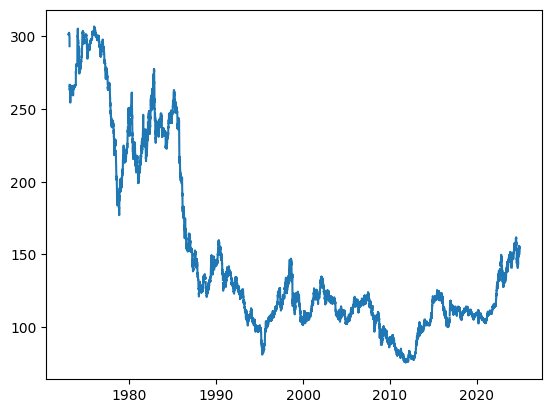

In [3]:
plt.plot(USDJPY) #円ドルレートのグラフ作成

5.　為替変動ボラティリティの算出

　為替レートの場合、株価よりもボラティリティの算出が論点になる場合が多い。その理由は、オプション取引等のデリバティブ取引により多くの輸出企業が、為替リスクヘッジを試みるためである。勿論、株式市場においてもデリバティブ取引は活発であるが、日本産業の場合、製造業の牽引役がこれまで輸出企業であったこともあり、為替変動ボラティリティが着目されることが多い。

In [ ]:
d_JPY=USDJPY.pct_change()
d_JPY2=d_JPY.dropna(axis=0, how="any")
plt.plot(d_JPY2) #円ドルレートボラティリティのグラフ作成
d_JPY2.describe() #記述統計の算出

**VII.　マクロ経済データの取得**

　金融資本市場を分析する際、市場インデックスや金利水準以外に重要となるのが各国・地域のマクロ経済動向である。マクロ経済データは、国内ファインダメンタルズを年次・四半期・月次のいずれの頻度で確認するのかにより、利用するデータソースが異なる。また、Intrnational Financial StatisticsやDirection of Trade Statisticsを長年刊行する国際通貨基金のデータであれば国際金融データおよび二カ国間貿易データが詳しい。世界銀行のデータは各国・地域のマクロ経済・金融・環境・貧困等、各国統計以外に独自のインデック等も含む。本例では、世界銀行のデータの取得事例を紹介する。

１．　wbgapi

　世界銀行のマクロ経済データを取得する場合にはwbgapiを予めインストールする必要がある。wbpyでも同様にAPIを通じてデータを取得することができる。国際通貨基金のデータベースからマクロ金融データを取得する場合はimfpyをインストールし、続いて同様にライブラリをインポートする。

In [ ]:
pip install wbgapi

2.　ライブラリの読み込み

　前述の通り、続いてwbdataのライブラリをインポートする。これによりpandas_datareaderを用いてデータを取得することができる。本例では標本期間を指定するためのdatatimeと図表作成のためのmatplotlibも併せてインポートする。

In [18]:
import wbgapi as wb #世界銀行データ取得のためのライブラリ
import pandas_datareader as data #データ取得ライブラリ
import pandas as pd #データセット管理のためのライブラリ
import matplotlib.pyplot as plt #図表作成のためのライブラリ

3.　国コードの検索方法

　日本は'JPN'、米国は'USA'など、先進主要国はわかりやすいが、アルゼンチンやオーストリアなど、日本人には直観的に国コードを想起できない国も多い。このような場合には、該当する国・地域名を入力することで国コードの検索が可能となる。

In [ ]:
display(wb.economy.info())

4.　経済金融データのティッカーコードの検索

　マクロ経済データや金融データのティッカーコードも、下記の手順で検索することができる。該当する英語の一部を入力すれば、複数の候補が検索される。これらは（本例であれば）世界銀行のホームページ

https://data.worldbank.org/indicator

でデータの内容、標本期間を確認することができるため、この中から自分が使用したいデータを候補の中から選択すればよい。

In [ ]:
display(wb.series.info(q='current account'))

5.　データの取得と可視化

In [21]:
countries = ["USA"]
indicators = {'BN.CAB.XOKA.GD.ZS':'IS Balance USA'}
df=wb.data.DataFrame(indicators,countries, time=range(1970, 2023), skipBlanks=True, columns='series')

6.　可視化

In [ ]:
df.plot();
df.describe()

**X.　データの保存と読み込み**

１.　データの保存

　先に述べたように、pandasはインターフェース上の互換性が高いため、CSVにデータを保存したり、CSVファイルからデータを読み込むことが容易である。それゆえ、APIにより取得したデータを例えばCSVファイル形式として保存する場合には、下記のSource Codeにより保存することができる。

In [5]:
USDJPY.to_csv('USDJPY.csv') #既存データの保存ファイル名の指定
from google.colab import files #保存のためのライブラリのインポート
files.download("USDJPY.csv") #確認のためのデータのダウンロード

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2.　データの読み込み

　データの読込みは保存に比べて、もうひとつのライブラリioを追加する必要がある。その上で書式を指定することで、この例ではCSVファイルを読み込み、その概要を表示している。

In [ ]:
import csv #データ読込みのためのライブラリのインポート
from google.colab import files
uploaded = files.upload() #データアップロードの指示
import io #データ形式指定のライブラリのインポート
df = pd.read_csv(io.BytesIO(uploaded['USDJPY.csv'])) #データ読込みの指示
df.head() #データ概要の表示